# MNIST Classifier

In this notebook you will create both, an mnist tabular dataset and a classifier.

## 1.- import the Operating System (os) module in python and any other library you need

In [44]:
import os
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC



## 2.- As you can see each class has its own folder (Do it only for train). 

    - Iterate folder by folder ( os.listdir() )
    - Inside each folder: 
        1.- Read the image
        2.- Reshape it into a flat array (784,)
        3.- Save the data into a pandas dataframe apending the column name as the class
    - Save the data into a CSV

    Note: if it takes to long try doing only 100 images per folder and the teacher for the CSV.

In [64]:
def load_images(path, max_images = None):
    """Load images into a Pandas DataFrame.

    Args:
        path (str): Path to the folder contening the subfolders for each image category
        max_images (int, optional): The maximum number of images to load from each category(subfolder). Defaults to None.

    Returns:
        Pandas Dataframe: each row represents an image and each column the value of a pixel
    """

    df = pd.DataFrame()
    for folder in os.listdir(path):

        # Number of images per folder to load
        if max_images is None:
            images = os.listdir(f'{path}/{folder}')
        else:
            images = os.listdir(f'{path}/{folder}')[: max_images]

        for name in images:
            img_pth = os.path.join(f'{path}/{folder}', name)
            img = Image.open(img_pth)
            img_arr = np.array(img, dtype=float).flatten()

            # append flattened arrays column-wise
            df = pd.concat([df,pd.DataFrame(img_arr, columns=[folder])], axis = 1)

            # Transpose(each column becomes a row), make index(containing the labels) to a column and rename that column
    return df.T.reset_index().rename(columns={"index":'label'})

        

In [74]:
df = load_images(path='data/trainingSet', max_images=1000)
print(df.shape)
df.head()

(10000, 785)


,label,0,1,2,3,4,5,6,7,8,...,774,775,776,777,778,779,780,781,782,783
0,0,3.0,0.0,0.0,3.0,7.0,3.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [75]:
# Saving to a csv file
df.to_csv('data/images.csv', index=False)

## 3.- Load the CSV

In [76]:
data = pd.read_csv('data/images.csv')
print(data.shape)
data.head()

(10000, 785)


,label,0,1,2,3,4,5,6,7,8,...,774,775,776,777,778,779,780,781,782,783
0,0,3.0,0.0,0.0,3.0,7.0,3.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [82]:
data.describe()

,label,0,1,2,3,4,5,6,7,8,...,774,775,776,777,778,779,780,781,782,783
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.00000,10000.000000,...,10000.00000,10000.000000,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.500000,0.311100,0.357800,0.370000,0.258100,0.32640,0.323500,0.297500,0.28750,1.886600,...,0.88400,0.535800,0.504900,0.5667,0.474200,0.427400,0.003900,0.003800,0.001700,0.001400
std,2.872425,1.406384,1.595504,1.624058,1.329534,1.50542,1.495818,1.447965,1.32613,3.001673,...,5.82197,4.116626,3.415603,2.2127,1.910262,1.839584,0.181901,0.176603,0.076796,0.088311
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,...,0.00000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,...,0.00000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.500000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,...,0.00000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,3.000000,...,0.00000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9.000000,20.000000,22.000000,22.000000,27.000000,24.00000,23.000000,22.000000,21.00000,20.000000,...,255.00000,250.000000,197.000000,73.0000,27.000000,32.000000,11.000000,11.000000,4.000000,7.000000


## 4.- Create a dictionary of models (No preprocessing needed, it has already been done).
    
    Include both, tree models and mult models.

In [83]:
# features and label separation
X = data.drop(columns='label') / 255
y = data['label']
print(X.shape, y.shape)

(10000, 784) (10000,)


In [84]:
# Models
models = {'dt': DecisionTreeClassifier(random_state=0),
           'rf': RandomForestClassifier(random_state=0), 
          'svc': SVC(random_state=0), 
          'mlp': MLPClassifier()}

## 5.- Using either cross validation or stratification find out which is the best model
    - Base your code on the previous two days examples

In [85]:
results = pd.DataFrame()

for name, model in models.items():

    # Time to fit the model
    start_time = time.time()
    model.fit(X, y)
    final_time = time.time() - start_time

    # Cross validation
    cross_val_mean = cross_val_score(model, X, y).mean()
    cross_val_std = cross_val_score(model, X, y).std()

    # Append to results
    to_append = pd.DataFrame({'model':[name], 'cross_val_mean': [cross_val_mean], 'cross_val_std':[cross_val_std],'training_time':[final_time]})
    results = pd.concat([results, to_append])
    

In [86]:
results.sort_values('cross_val_mean', ascending = False)

,model,cross_val_mean,cross_val_std,training_time
0,svc,0.9580,0.004980,11.754997
0,mlp,0.9498,0.003992,39.040005
0,rf,0.9384,0.005342,14.118306
0,dt,0.7713,0.010787,3.857998


The best model is `svc` based on the mean of cross validation scores.

## Optional: Can you rotate an image?

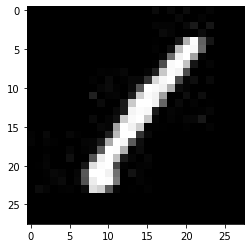

In [119]:
# Take an image and reshape to a 28X28 
example_image = data.drop(columns='label').values[1000].reshape(28, 28)

plt.imshow(example_image, cmap='gray')

PIL.Image.Image

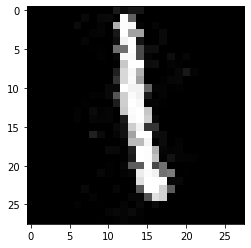

In [123]:
# convert the image to a PIL object. 
# PIL offers some convenient methods to manipulate images
# among wich, rotation.
example_image_rotated = Image.fromarray(example_image.astype(int)).rotate(45)

plt.imshow(np.array(example_image_rotated), cmap='gray')
